In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=["Id"])

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

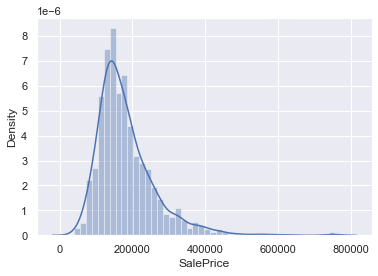

In [6]:
sns.distplot(y_train)

In [7]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) на числовых признаках из нашего датасета
# TO DO

numeric_features = [c for c in X_train.columns if X_train[c].dtype.name != 'object']
X_train[numeric_features] = X_train[numeric_features].fillna(0)
X_test[numeric_features] = X_test[numeric_features].fillna(0)
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train[numeric_features], y_train)
print('LinearRegression score: {}'.format(model.score(X_test[numeric_features],y_test)))

Rd = linear_model.Ridge()
Rd.fit(X_train[numeric_features], y_train)
print('Ridge score: {}'.format(Rd.score(X_test[numeric_features],y_test)))

Ls = linear_model.Lasso()
Ls.fit(X_train[numeric_features], y_train)
print('Lasso score: {}'.format(Ls.score(X_test[numeric_features],y_test)))

LinearRegression score: 0.8301388056823069
Ridge score: 0.8303219729837287
Lasso score: 0.8301569000695335


$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

In [8]:
# Определите RMSE через функцию sklearn.metrics.make_scorer
# TO DO
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
def rmse(X, y):
  return np.sqrt(mean_squared_error(X, y))

rmse_score = make_scorer(rmse, greater_is_better = False)

In [9]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

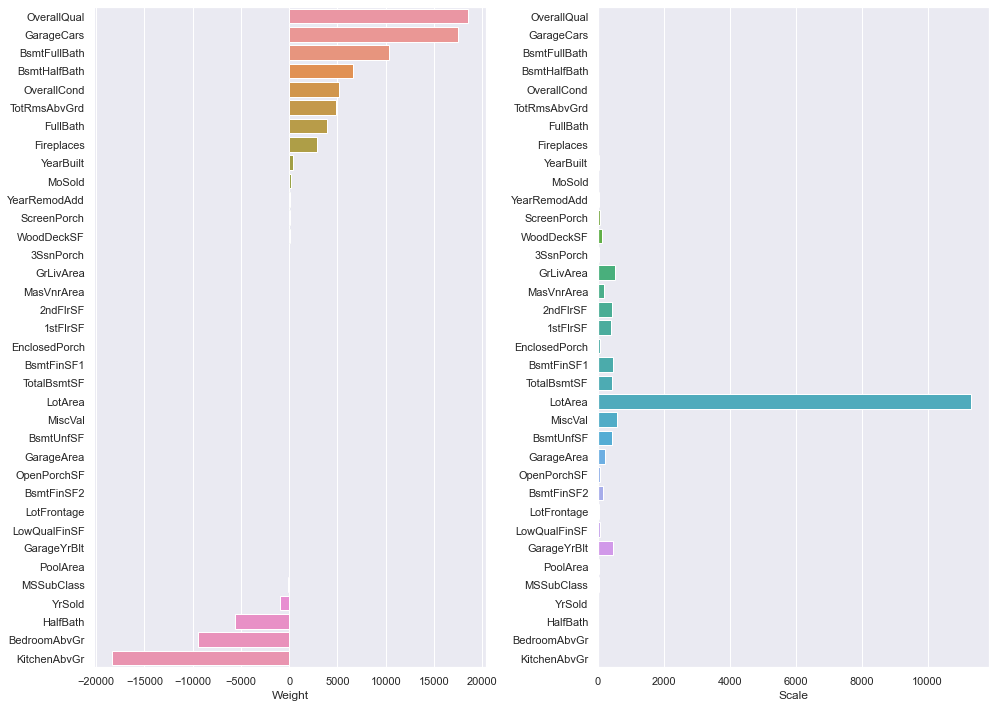

In [10]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

In [11]:
# Отмасштабируйте признаки перед обучением модели, воспользуясь трансформером StandardScaler
# TO DO
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
model = linear_model.Lasso()
model.fit(X_train_scaled, y_train)

Lasso()

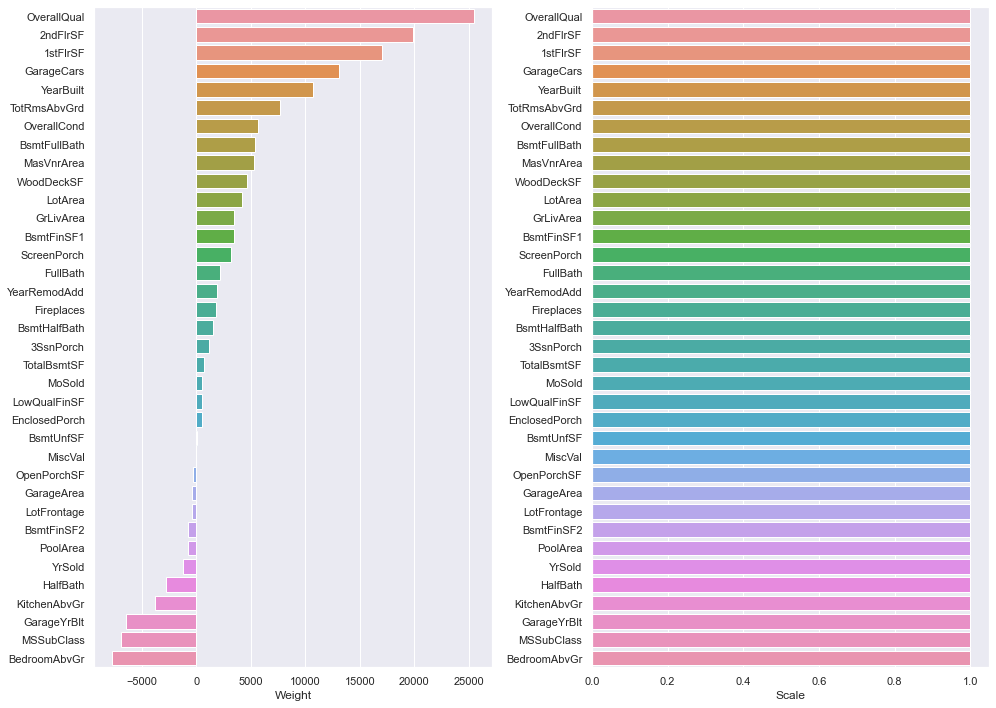

In [12]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

In [13]:
# Подберите коэффициент регуляризации alpha, воспользуясь GridSearchCV
# TO DO
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(linear_model.Ridge(), 
                               [{'alpha': np.logspace(0,5,1000)}])
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)


{'alpha': 429.17323784221577}


In [14]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) с подобранным коэффициентом регуляризации на числовых признаках из нашего датасета, воспользуясь классом Pipeline (не забывать про мастабирование признаков через StandardScaler)
# TO DO
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler', StandardScaler(with_mean=False)), ('regression', linear_model.Ridge(alpha=429.17323784))])
pipeline.fit(X_train[numeric_features], y_train)
print('Ridge score: {}'.format(pipeline.score(X_test[numeric_features],y_test)))


Ridge score: 0.8277416449622316


In [15]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [16]:
X_train[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
782,RL,Pave,NotGiven,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
12,RL,Pave,NotGiven,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,Detchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
819,RL,Pave,NotGiven,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,Attchd,RFn,TA,TA,Y,NotGiven,NotGiven,NotGiven,New,Partial
119,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,New,Partial
399,FV,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal


In [17]:
# Закодируйте категориальные признаки числами с помощью OneHotEncoder и обучите модели на всех признаках
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X[categorical] = X[categorical].fillna("NotGiven")
column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), categorical)], remainder='passthrough')
column_transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(),
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', ...])])

In [18]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)
X_train =  column_transformer.transform(X_train)


Size before OneHot: (1022, 79)
Size after OneHot: (1022, 304)


In [19]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами

In [20]:
Rd = linear_model.Ridge() #l2
Rd.fit(X_train, y_train)
Ls = linear_model.Lasso() #l1
Ls.fit(X_train, y_train)

ridge_zeros = np.sum(Rd.coef_ == 0)
lasso_zeros = np.sum(Ls.coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 10
Zero weights in Lasso: 39


In [21]:
# Подберите коэффициент регуляризации для всех моделей, воспользуясь GridSearchCV
# TO DO
pipeline = Pipeline([('scaler', StandardScaler(with_mean=False)), ('regression', linear_model.Ridge())])
lasso_pipeline = Pipeline([('scaler', StandardScaler(with_mean=False)), ('regression',linear_model.Lasso())])
pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

gbr_grid_search = GridSearchCV(pipeline, 
                               [{'regression__alpha': np.logspace(0, 5, 100)}])
gbr_grid_search.fit(X_train, y_train)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

gbr_grid_search = GridSearchCV(lasso_pipeline, 
                               [{'regression__alpha': np.logspace(0, 5, 100)}])
gbr_grid_search.fit(X_train, y_train)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

0.787536229434747
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('regression', Ridge(alpha=849.7534359086438))])
0.7697682930786354
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('regression', Lasso(alpha=3853.5285937105273))])


In [22]:
lasso_pipeline = Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('regression', linear_model.Lasso(alpha=3853.52859))])
lasso_pipeline.fit(X_train, y_train)

pipeline = Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('regression', linear_model.Ridge(alpha=849.7534))])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('regression', Ridge(alpha=849.7534))])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

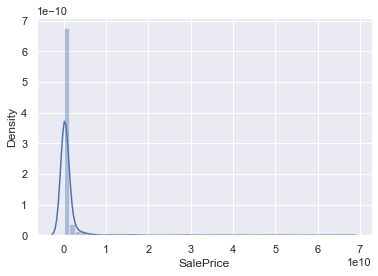

In [23]:

error = (y_train - lasso_pipeline.predict(X_train)) ** 2
sns.distplot(error)

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. Например, выбросим примеры, остаток у которых больше 0.95-квантили.

In [24]:
# Выбросите из обучающей выборки примеры, остаток у которых больше 0.95-квантили и переобучите модели 
# TO DO
quantile = np.quantile(error, 0.95)
mask = error <= quantile

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

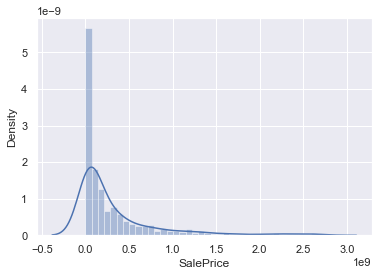

In [25]:
error = (y_train[mask] - lasso_pipeline.predict(X_train[mask])) ** 2
sns.distplot(error)

In [26]:
# Получите скор по нашей метрике (RMSE) ниже значения 30000
# TO DO
lasso_pipeline.fit(X_train[mask], y_train[mask])
print(rmse_score(lasso_pipeline, X_train[mask], y_train[mask]))

-19799.66775740222
